------------------------------------------------------------------

#  PROJECT ON SOFTWARE ENGINEERING


***EnergyWise: Predicting Energy Consumption for a Greener Tomorrow!!!***

------------------------------------------------------------------------


***Problem Description:***

   Create a forecasting model to predict energy consumption patterns in residential and commercial buildings using historical usage data, weather conditions, and occupancy information.



-----------------------------------------------------------------------------------


**STEP 1: DEFINE THE PROBLEM STATEMENT**

*   *Clarify the objective*
*   *Identify Key questions*

*   *Define Success Metrics*
*   *Specify the scope*





**CLARIFY THE OBJECTIVE:**

*  **GOAL:** *Develop a forecasting model to predict energy consumption for residential and commercial buildings.*
*   **DATA SOURCES:** *Utilize historical energy usage data, weather forecasts, and occupancy information.*



**IDENTIFY KEY QUESTIONS:**

*   *What are the main factors that influence energy consumption in residential and commercial buildings?*
*   *How can historical energy usage patterns help improve prediction accuracy?*

*   *In what ways do weather conditions (temperature, humidity, etc.) affect energy consumption?*
*   *How does occupancy level impact energy consumption patterns?*

*   *What seasonal variations in energy consumption can be expected based on the provided data?*








**DEFINE SUCCESS METRICS:**

*   **ACCURACY METRICSS:** *Aim for a Mean Absolute Error (MAE) of less than 5%.*
*   **INTERPRETABILITY:** *The model should provide insights that can lead to actionable energy-saving strategies.*



**SPECIFY THE SCOPE:**

*   **Residential vs. Commercial:** *Decide whether to focus exclusively on residential buildings or include commercial buildings as well.*
*   **Time Frame:** *Analyze the dataset from the past 14 months, focusing on one-minute interval data.*


*   **Feature Selection:** *Identify which features from the dataset will be included in the analysis (e.g., active power, weather conditions).*




---------------------------------------------------------------------

**STEP 2: DATA COLLECTION AND INITIAL EXPLORATION**

*1. Load the data*



In [ ]:
import pandas as pd
data = pd.read_csv('/content/energy_weather_raw_data.csv')


*2. Understand the data structure*

*   **date**: Timestamp of the data point, indicating the date and time of the measurement.

*   **active_power:** The actual power consumed by the household, measured in watts (W).

*   **current:** The electric current flowing through the circuit, measured in amperes (A).

*   **voltage:** The electrical potential difference in the system, measured in volts (V).
*   **reactive_power:** The power that oscillates between the source and the load, measured in reactive volt-amperes (VAR).

*   **apparent_power:** The combination of active and reactive power, measured in volt-amperes (VA).
*   **power_factor:** The ratio of active power to apparent power, indicating the efficiency of power usage.

*   **main:** Categorical variable representing the overall weather condition (e.g., Clear, Clouds, Fog).
*   **description**: Detailed categorical description of the weather condition (e.g., clear sky, light rain).

*   **temp:** The ambient temperature, measured in degrees Celsius (°C).
*   **feels_like:** The perceived temperature that accounts for humidity, also measured in degrees Celsius (°C).

*   **temp_min:** The minimum temperature recorded during the day, measured in degrees Celsius (°C).
*   **temp_max:** The maximum temperature recorded during the day, measured in degrees Celsius (°C).

*   **pressure:** The atmospheric pressure, measured in hectopascals (hPa).
*   **humidity:** The percentage of moisture in the air.

*   **speed:** Wind speed, measured in meters per second (m/s).
*   **deg:** Wind direction, expressed in degrees (°) from true north.

*   **temp_t+1:** The forecasted temperature for the next day, measured in degrees Celsius (°C).
*   **feels_like_t+1:** The forecasted perceived temperature for the next day, measured in degrees Celsius (°C).



In [ ]:
data.head()

,date,active_power,current,voltage,reactive_power,apparent_power,power_factor,main,description,temp,feels_like,temp_min,temp_max,pressure,humidity,speed,deg,temp_t+1,feels_like_t+1
0,2022-11-05 14:05:00,265.1,2.53,122.2,159.09,309.17,0.8575,Clear,clear sky,24.19,23.68,23.44,27.5,1013.0,39.0,0.0,0.0,29.63,27.97
1,2022-11-05 14:06:00,265.1,2.53,122.2,159.09,309.17,0.8575,Clear,clear sky,24.19,23.68,23.44,27.5,1013.0,39.0,0.0,0.0,29.63,27.97
2,2022-11-05 14:07:00,265.1,2.53,122.2,159.09,309.17,0.8575,Clear,clear sky,24.19,23.68,23.44,27.5,1013.0,39.0,0.0,0.0,29.63,27.97
3,2022-11-05 14:08:00,640.0,5.45,120.7,152.08,657.82,0.9729,Clear,clear sky,24.19,23.68,23.44,27.5,1013.0,39.0,0.0,0.0,29.63,27.97
4,2022-11-05 14:09:00,257.6,2.47,122.4,158.26,302.33,0.8520,Clear,clear sky,24.19,23.68,23.44,27.5,1013.0,39.0,0.0,0.0,29.63,27.97


*3. Overview of the data columns*

   This provides a clear overview of the dataset, confirming that all columns are free of missing values, which is essential for reliable analysis. It categorizes the types of data present, distinguishing between numerical and categorical variables, thus informing the necessary preprocessing steps. With over 605,000 entries, this dataset offers a substantial foundation for developing our predictive model. Additionally, the memory usage details help in understanding the computational resources required for data processing. Overall, this summary serves as an important checkpoint to ensure that our data is prepared and ready for the next phases of the project.




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192549 entries, 0 to 192548
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            192549 non-null  object 
 1   active_power    192549 non-null  float64
 2   current         192549 non-null  float64
 3   voltage         192549 non-null  float64
 4   reactive_power  192549 non-null  float64
 5   apparent_power  192549 non-null  float64
 6   power_factor    192549 non-null  float64
 7   main            192549 non-null  object 
 8   description     192549 non-null  object 
 9   temp            192549 non-null  float64
 10  feels_like      192549 non-null  float64
 11  temp_min        192549 non-null  float64
 12  temp_max        192549 non-null  float64
 13  pressure        192548 non-null  float64
 14  humidity        192548 non-null  float64
 15  speed           192548 non-null  float64
 16  deg             192548 non-null  float64
 17  temp_t+1  

*4. Check for missing values*

   There is no missing values in the dataset. So there is no problem of handling missing values in our dataset.



In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 date              0
active_power      0
current           0
voltage           0
reactive_power    0
apparent_power    0
power_factor      0
main              0
description       0
temp              0
feels_like        0
temp_min          0
temp_max          0
pressure          1
humidity          1
speed             1
deg               1
temp_t+1          1
feels_like_t+1    1
dtype: int64


*5. Explore statistical summaries:*

   The statistical summary of the dataset reveals key insights, such as the completeness of data entries and the range of values for each variable. The mean and standard deviation indicate central tendencies and variability, while quartiles provide a deeper understanding of data distribution. This overview is essential for informed data preprocessing and effective model development.




   


In [ ]:
data.describe()

,active_power,current,voltage,reactive_power,apparent_power,power_factor,temp,feels_like,temp_min,temp_max,pressure,humidity,speed,deg,temp_t+1,feels_like_t+1
count,192549.000000,192549.000000,192549.000000,192549.000000,192549.000000,192549.000000,192549.000000,192549.000000,192549.000000,192549.000000,192548.000000,192548.000000,192548.000000,192548.000000,192548.000000,192548.000000
mean,236.956030,2.224567,123.778623,125.990325,274.174944,0.832617,15.985079,14.918872,14.805800,17.561129,1016.767035,45.884143,2.530055,164.262210,16.023177,14.954666
std,165.281234,1.416386,1.493391,68.404152,169.843500,0.113238,6.179231,6.298470,5.880647,5.905227,6.062546,21.343502,1.957637,123.360581,6.166837,6.286473
min,24.400000,0.300000,112.800000,11.120000,37.140000,0.201800,-5.560000,-6.130000,-5.560000,-5.560000,996.000000,2.000000,0.000000,0.000000,-5.560000,-6.130000
25%,140.500000,1.460000,122.900000,71.180000,181.770000,0.715900,12.030000,10.680000,11.390000,13.440000,1012.000000,29.000000,1.100000,46.000000,12.030000,10.740000
50%,213.300000,2.000000,123.900000,111.790000,247.900000,0.865600,15.920000,14.820000,14.730000,17.030000,1016.000000,42.000000,2.260000,164.000000,15.920000,14.850000
75%,290.800000,2.690000,124.900000,170.190000,331.880000,0.933800,20.120000,19.100000,18.490000,22.030000,1021.000000,62.000000,3.680000,255.000000,20.120000,19.100000
max,2178.600000,19.310000,127.200000,1130.260000,2220.650000,0.999900,31.920000,29.690000,30.440000,32.120000,1035.000000,100.000000,10.290000,360.000000,31.920000,29.690000


*6. Explore date time features:*

In [ ]:
data['date'] = pd.to_datetime(data['date'])  # Convert to datetime format
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month

*7. Visulaize initial trends*

1.   The line plot serves as an important step in understanding how active power consumption varies over time, potentially correlating with external factors such as weather conditions or occupancy levels, which could further enhance predictive modeling efforts in our project.
2.   The histogram is an important exploratory data analysis step, explaining the underlying distribution of temperature values before incorporating them into our forecasting model.



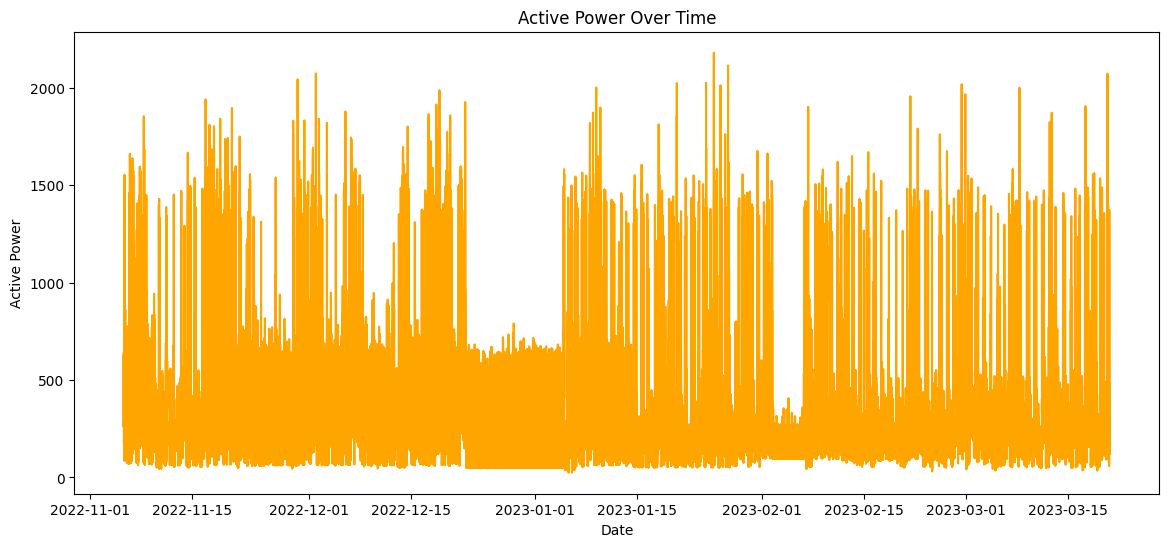

In [ ]:
import matplotlib.pyplot as plt

# Plot active power over time
plt.figure(figsize=(14,6))
plt.plot(data['date'], data['active_power'], color='orange')
plt.title('Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.show()


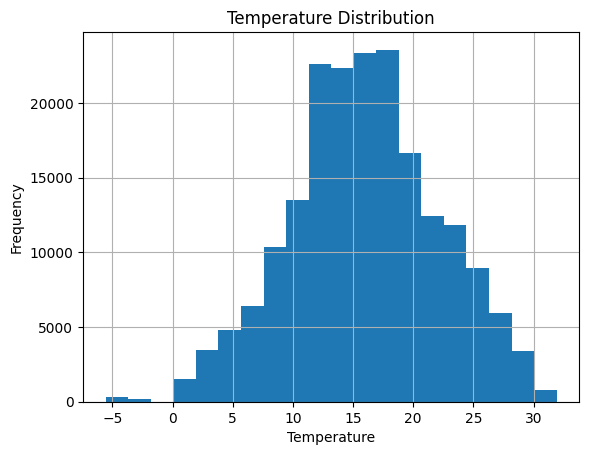

In [ ]:
# Histogram of temperature
data['temp'].hist(bins=20)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


*8. Explore Feature Correlations*

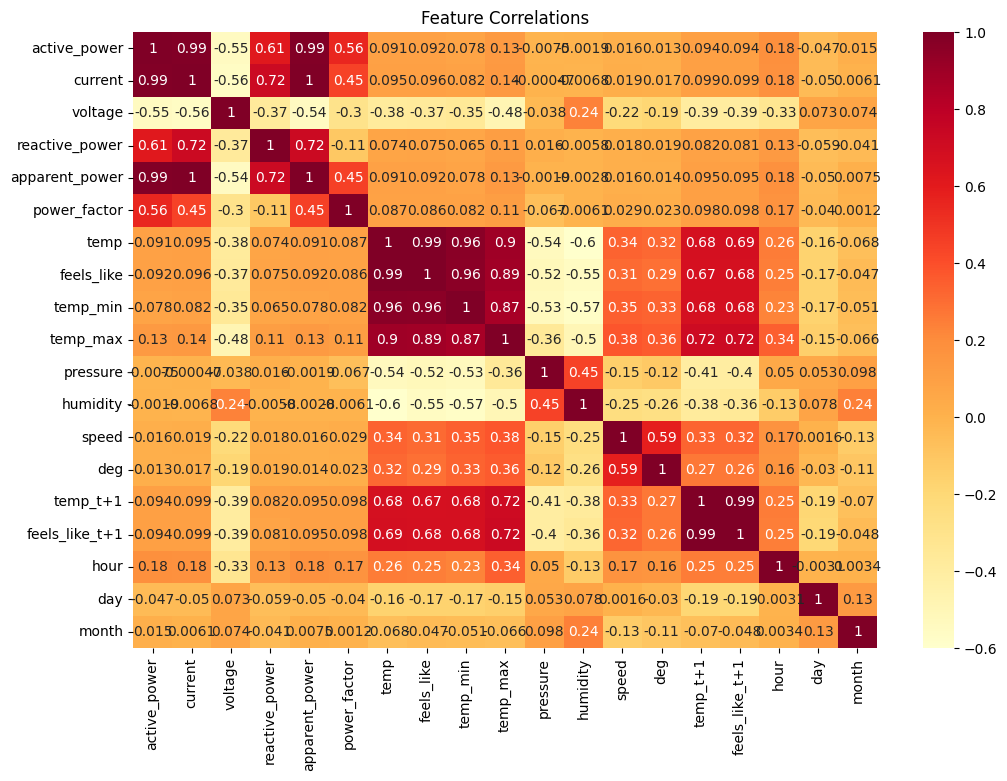

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='YlOrRd')
plt.title('Feature Correlations')
plt.show()

-------------------------------------------------------------------------

**STEP 3: FEATURE ENGINEERING**

1.   *Time based features*

   These features allow the model to recognize patterns based on the time of day, week, or year, which are often strong indicators in energy consumption data.

*   **Hour of Day**: *Captures daily cycles, as energy demand often varies at different times (e.g., peak usage in the evening).*
*   **Day of the Week:** *Reflects weekday vs. weekend trends. For instance, energy use may drop on weekends or vary by day.*
*   **Is Weekend:** *Adds a binary distinction that helps the model understand broader weekend patterns without needing specific day details.*
*   **Month:** *Identifies seasonal trends (e.g., higher AC usage in summer), which are common in energy consumption.*


   **PURPOSE:**Time-based features capture predictable cycles, helping the model understand when higher or lower energy use is expected based on historical patterns.















**HOUR OF DAY:** ***Indicates at which hour energy was used. This captures daily cycles.***

In [ ]:
data['hour'] = data['date'].dt.hour

**Day of Week:** ***Helps identify differences in energy use on weekdays vs. weekends.***

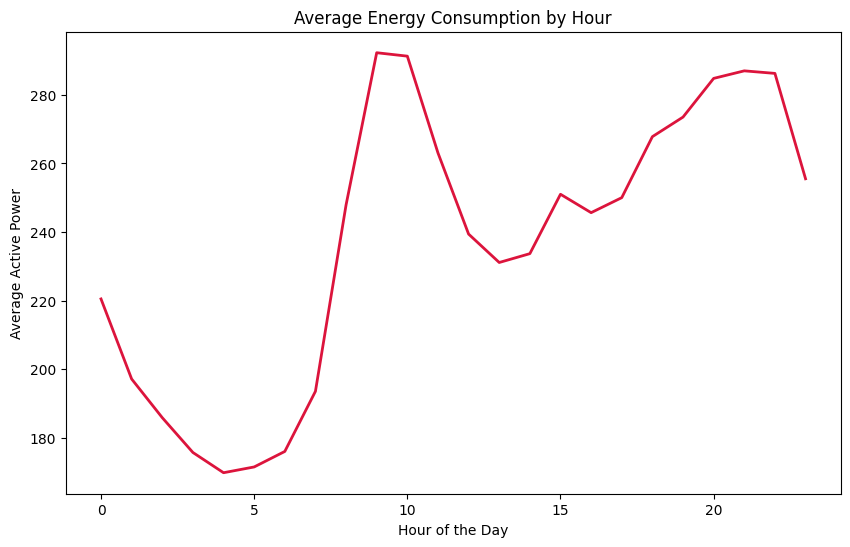

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Average power by hour of the day
hourly_avg = data.groupby('hour')['active_power'].mean()
plt.figure(figsize=(10, 6))
# Change color of the line to 'crimson' for a new look
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, color='crimson', linewidth=2)
plt.title('Average Energy Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Active Power')
plt.show()

In [ ]:
data['day_of_week'] = data['date'].dt.dayofweek

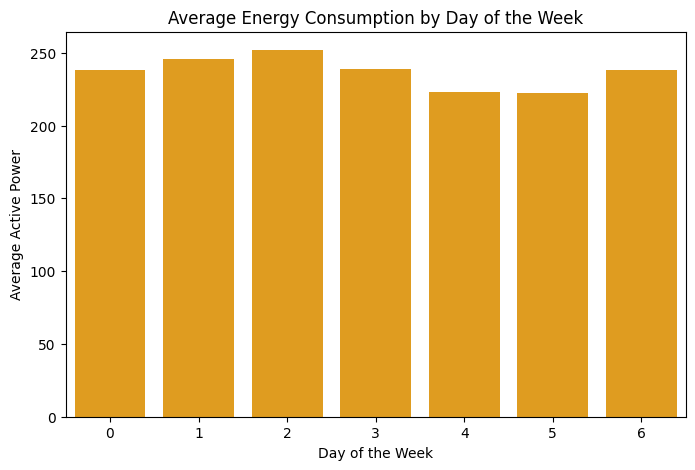

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Average power by day of the week
weekly_avg = data.groupby('day_of_week')['active_power'].mean()
plt.figure(figsize=(8, 5))
# Use a color palette for distinct bar colors
sns.barplot(x=weekly_avg.index, y=weekly_avg.values, color='orange')
plt.title('Average Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Active Power')
plt.show()

**Is Weekend:** ***A binary feature to distinguish weekends (1) from weekdays (0).***

In [ ]:
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

**Month:** ***Adds information about seasonal variations in energy consumption.***

In [ ]:
data['month'] = data['date'].dt.month

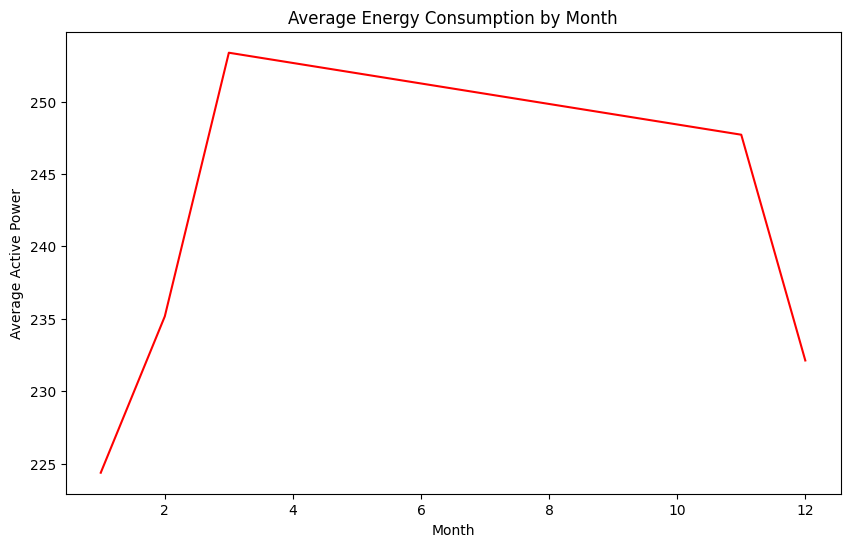

In [ ]:
# Average power by month
monthly_avg = data.groupby('month')['active_power'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, color='red')
plt.title('Average Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Active Power')
plt.show()


2. *Lag Features*

   Lag features look at past values to help the model understand recent trends, making it easier to predict future values based on short- and long-term usage patterns.
*   **Lagged Active Power (1 Hour):** Provides the immediate previous value, helping capture sudden fluctuations or stability in energy use.
*   **Lagged Active Power (24 Hours):** Captures the usage from the same hour on the previous day, helping the model identify daily usage cycles.


**PURPOSE:** These features allow the model to use past patterns to predict future values. If the previous hour or day had high usage, similar patterns may continue.

**Lagged Active Power (1 Hour):** ***Energy usage from one hour ago, providing short-term history.***

In [ ]:
data['active_power_lag1'] = data['active_power'].shift(1)

**Lagged Active Power (24 Hours):** ***Energy usage from the same hour the previous day. This is helpful for capturing daily usage patterns.***

In [ ]:
data['active_power_lag24'] = data['active_power'].shift(24)

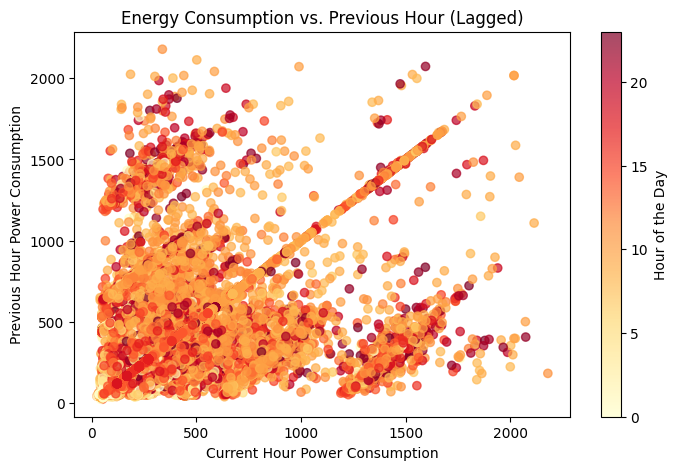

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Scatter plot with color based on hour of the day
scatter = plt.scatter(data['active_power'], data['active_power_lag1'],
                      c=data['hour'], cmap='YlOrRd', alpha=0.7)

plt.colorbar(scatter, label='Hour of the Day')  # Colorbar legend for hour

plt.title('Energy Consumption vs. Previous Hour (Lagged)')
plt.xlabel('Current Hour Power Consumption')
plt.ylabel('Previous Hour Power Consumption')
plt.show()


3. *Rolling Statistics*

   Rolling statistics smooth out short-term fluctuations and highlight longer-term trends.
*   **Rolling Mean (24 Hours):** Calculates the average usage over a full day, giving the model insight into overall daily trends without focusing too heavily on minute-to-minute changes.

*   **Rolling Standard Deviation (24 Hours):** Shows variability in usage over the past 24 hours. A high standard deviation may indicate fluctuating patterns, while low variability suggests stability.

**PURPOSE**: Rolling statistics help the model detect broader trends and volatility in energy consumption, capturing shifts in behavior without overemphasizing small, short-term changes.

**Rolling Mean (24 Hours):** ***Average energy use over the past 24 hours, showing general trends in recent usage.***

In [ ]:
data['active_power_rolling_mean_24'] = data['active_power'].rolling(window=24).mean()

**Rolling Standard Deviation (24 Hours):** ***Shows variability in energy usage over the past 24 hours, which can help detect unusual spikes or drops.***

In [ ]:
data['active_power_rolling_std_24'] = data['active_power'].rolling(window=24).std()

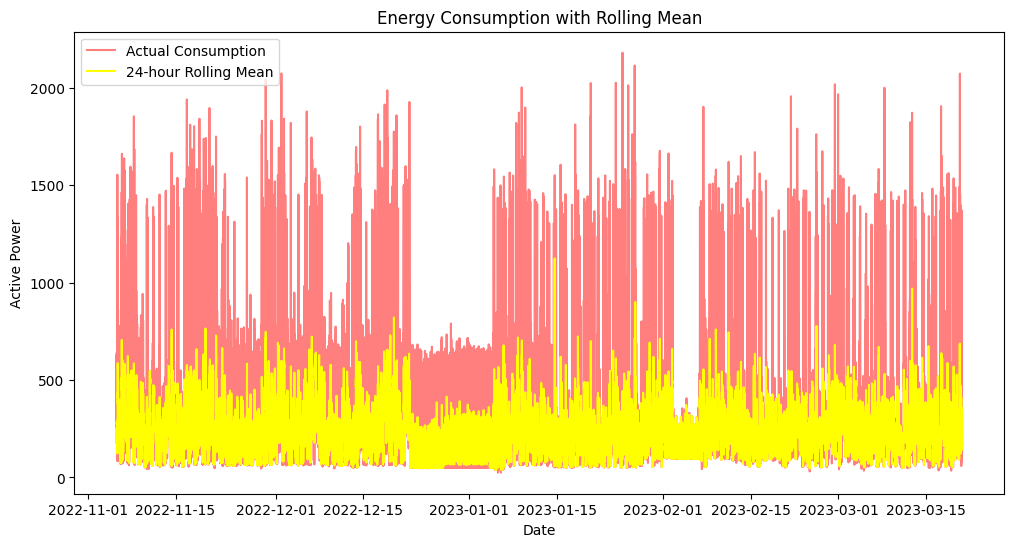

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['active_power'], label='Actual Consumption', alpha=0.5, color='red')
plt.plot(data['date'], data['active_power_rolling_mean_24'], label='24-hour Rolling Mean', color='yellow')
plt.title('Energy Consumption with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.legend()
plt.show()


4. *Interaction Features*

   Interaction features combine multiple variables, capturing complex relationships that single features can’t convey.
   
*   **Temperature and Humidity Interaction:** Temperature and humidity together impact energy use, especially in heating, cooling, or ventilation. For instance, high humidity and high temperatures may drive up energy for cooling systems.

**PURPOSE:** By capturing combined effects, interaction features allow the model to better understand how environmental factors influence energy consumption in complex scenarios.

**Temperature and Humidity Interaction:** ***Energy consumption often changes with weather. This feature multiplies temperature by humidity to show the combined impact.***

In [ ]:
data['temp_humidity_interaction'] = data['temp'] * data['humidity']

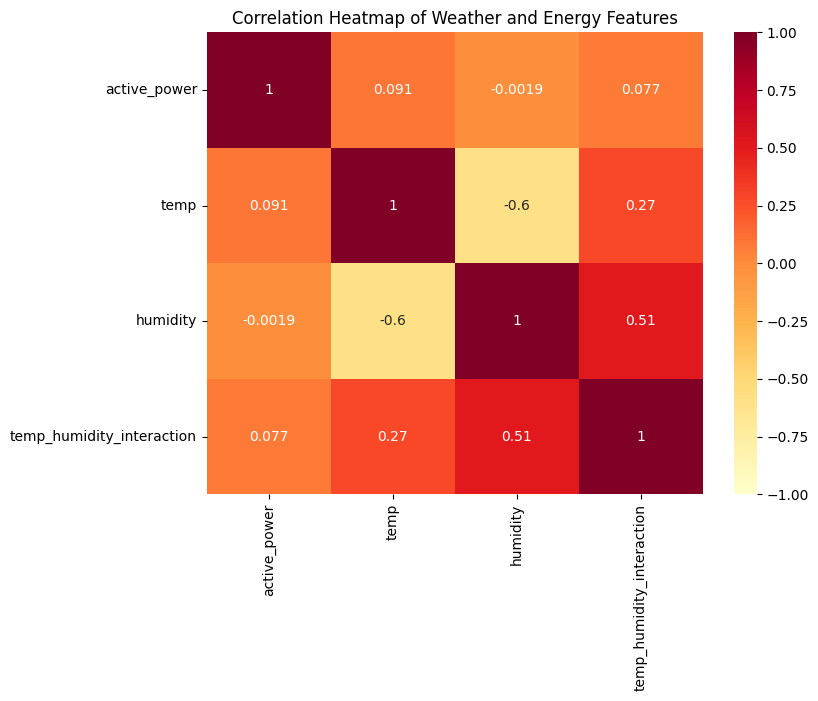

In [ ]:
corr = data[['active_power', 'temp', 'humidity', 'temp_humidity_interaction']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Weather and Energy Features')
plt.show()

5. *Handling Missing Values*

   When we create features like lags and rolling statistics, some initial entries may become NaN (missing). Handling these ensures data continuity and prevents errors during model training.

**PURPOSE**: Filling missing values ensures that all features are complete and ready for modeling without interruptions from gaps in data.

**Backward Fill:** ***Fills missing values using the next valid data point, suitable for preserving future trends in time series data.***

In [ ]:
data.bfill(inplace=True)

In [ ]:
data.tail()

,date,active_power,current,voltage,reactive_power,apparent_power,power_factor,main,description,temp,...,hour,day,month,day_of_week,is_weekend,active_power_lag1,active_power_lag24,active_power_rolling_mean_24,active_power_rolling_std_24,temp_humidity_interaction
192544,2023-03-20 18:31:00,167.5,1.93,123.2,168.77,237.78,0.7044,Clear,clear sky,18.37,...,18,20,3,0,0,167.5,120.9,165.500000,39.627384,771.54
192545,2023-03-20 18:32:00,167.5,1.93,123.2,168.77,237.78,0.7044,Clear,clear sky,18.37,...,18,20,3,0,0,167.5,120.9,167.441667,38.471863,771.54
192546,2023-03-20 18:33:00,167.5,1.93,123.2,168.77,237.78,0.7044,Clear,clear sky,18.27,...,18,20,3,0,0,167.5,120.9,169.383333,37.174871,785.61
192547,2023-03-20 18:34:00,167.5,1.93,123.2,168.77,237.78,0.7044,Clear,clear sky,18.27,...,18,20,3,0,0,167.5,120.9,171.325000,35.720999,785.61
192548,2023-03-20 18:35:00,167.5,1.93,123.2,168.77,237.78,0.7044,Clear,clear sky,18.27,...,18,20,3,0,0,167.5,120.9,173.266667,34.090183,NaN


**STEP 4: MODEL TRAINIG AND PREDICTION**

   In this step, we’ll train the model on the engineered features and use it to make predictions. We’ll go through each part step by step:

1.  **Train-Test-Split:** *Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.*





In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(['active_power'], axis=1)  # All columns except target
y = data['active_power']                 # Target column

# Split data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. **Selecting and Training the Model:**

In [ ]:
# Drop or transform non-numeric columns
data = data.drop(columns=['date', 'main', 'description'])  # Drop unnecessary columns if they're not useful

# Or, if 'date' is useful, extract parts of it:
# data['year'] = data['date'].dt.year
# data['month'] = data['date'].dt.month
# data['day'] = data['date'].dt.day
# data = data.drop(columns=['date'])

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['active_power']), data['active_power'], test_size=0.2, random_state=42)

# Train the model
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

3. **Making Predictions:**

   *Use the trained model to make predictions on the test set.*




In [ ]:
# Generate predictions on test data
predictions = model.predict(X_test)


**STEP 5: MODEL EVALUATION AND INTERPRETATION:**

1.   **Evaluate the Model with Performance Metrics**: *The common metrics for regression models include Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). These will quantify the difference between your predictions and actual values.*






In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 1.66
Mean Squared Error (MSE): 28.89
Root Mean Squared Error (RMSE): 5.38


2. **Visualization of Predictions vs. Actual Values:** *A scatter plot of actual vs. predicted values helps visualize how well the model captures the data's trends. The closer the points are to the line y = x, the better the model.*

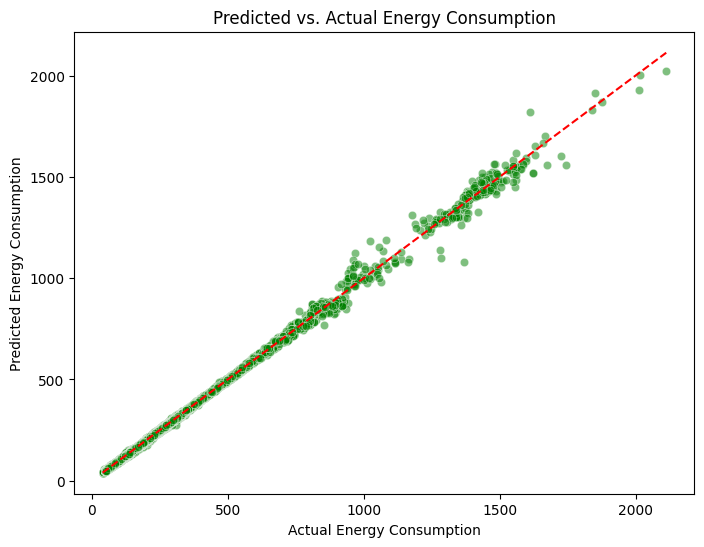

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predicted vs. Actual Energy Consumption')
plt.show()

3. **Residual Analysis:** *Residuals (the difference between actual and predicted values) should ideally have a mean of zero and be randomly distributed. A histogram of residuals can indicate whether there’s any systematic error in the model’s predictions.*

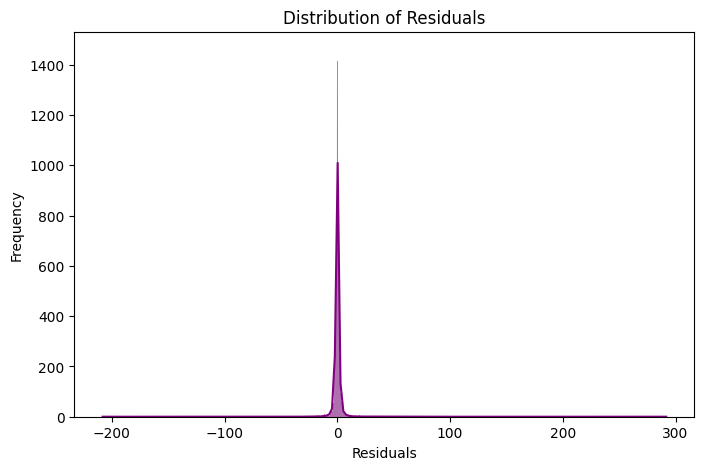

In [ ]:
residuals = y_test - predictions

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


4. **Feature Importance (Interpretability):** *For interpretability, examine which features contributed most to the model’s predictions. XGBoost provides feature importance scores, which can be visualized with a bar chart.*

Adjusted length of feature_names: 25
Length of importances: 25


<ipython-input-35-d92f5decd946>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="magma")


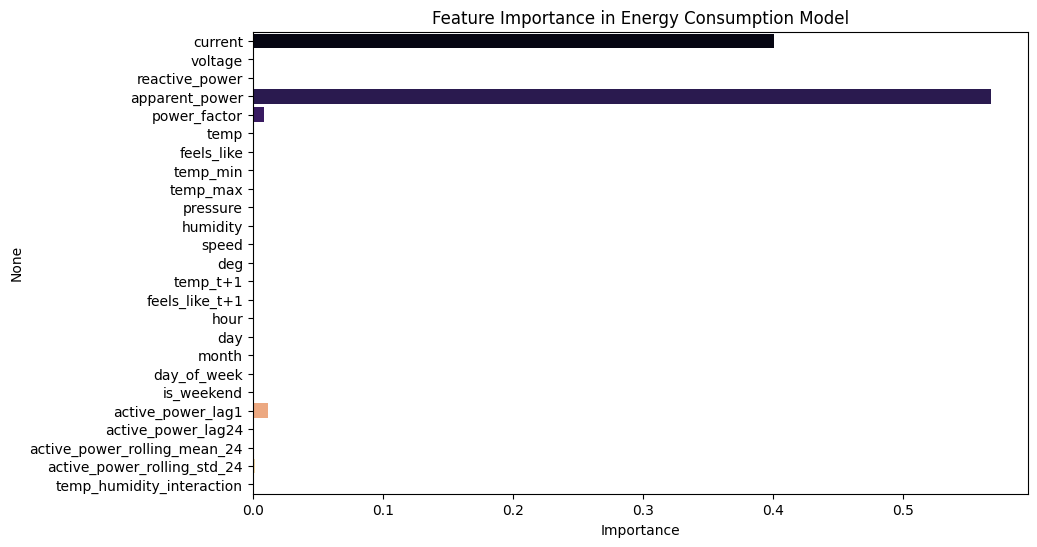

In [ ]:
# Train your XGBoost model (assuming model has been defined and trained)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Ensure feature_names aligns with X_train columns
feature_names = X_train.columns  # Get the actual feature names from the training data

# Verify lengths again
print("Adjusted length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

# Plot if lengths match
if len(importances) == len(feature_names):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=feature_names, palette="magma")
    plt.xlabel('Importance')
    plt.title('Feature Importance in Energy Consumption Model')
    plt.show()
else:
    print("Still a mismatch. Further verification needed.")


**STEP 6: Generating User Insights**
1.   **Forecast Statements:** *Generate clear, user-friendly statements based on the model’s predictions. For example, “Your expected energy consumption for the next hour/day is estimated to be XX kWh,” which helps users prepare for anticipated consumption.*




In [ ]:
# Sample forecast statement for the next time period
next_period_prediction = model.predict([X_test.iloc[-1]])  # Using the last test example
print(f"Forecast: Your expected energy consumption for the next period is approximately {next_period_prediction[0]:.2f} kWh.")


Forecast: Your expected energy consumption for the next period is approximately 213.22 kWh.


2. **Smart Alerts for Unusual Consumption:** *Define thresholds for high or low energy usage based on historical data or user preferences. Generate alerts when predictions exceed these thresholds.For instance, if the model predicts significantly higher consumption, issue a “High Consumption Alert” with suggested actions like reducing appliance usage.*

In [ ]:
# Define threshold for alert (customize based on your data insights)
high_usage_threshold = y_train.mean() + 2 * y_train.std()  # Example: 2 standard deviations above mean

# Check if the next period prediction exceeds the threshold
if next_period_prediction > high_usage_threshold:
    print("Smart Alert: High Energy Consumption Detected! Consider reducing usage of non-essential devices to save on energy costs.")


3. **Visualize Trends for User-Friendly Dashboards:** *Include a time-series chart of forecasted consumption for the next day/week, helping users to visually grasp consumption trends.*

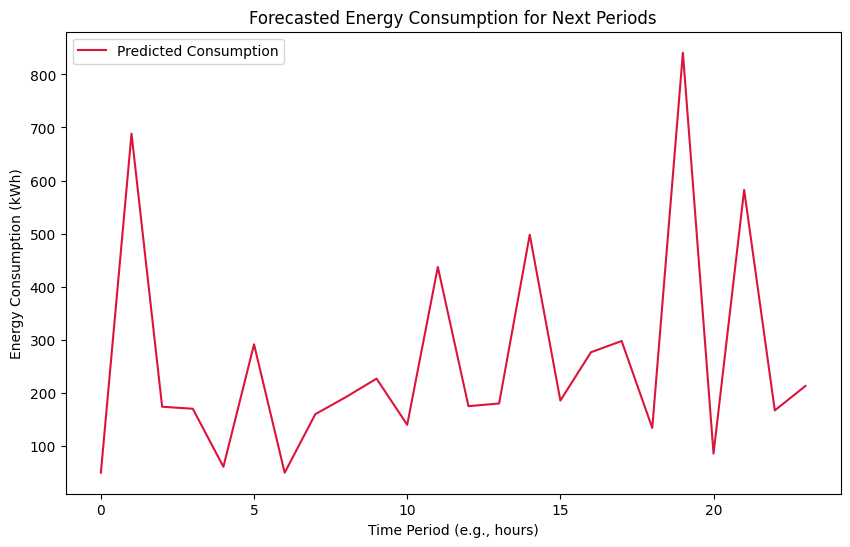

In [ ]:
# Visualization: Forecast for the next few periods (e.g., next 24 hours)
forecast_periods = 24  # Example for hourly data, customize as needed
future_predictions = model.predict(X_test.tail(forecast_periods))

plt.figure(figsize=(10, 6))
plt.plot(range(forecast_periods), future_predictions, label='Predicted Consumption', color="crimson")
plt.xlabel("Time Period (e.g., hours)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Forecasted Energy Consumption for Next Periods")
plt.legend()
plt.show()


Testing


Data preprocessing

In [ ]:
def test_preprocess_data():
    # Mock input data
    data = pd.DataFrame({'A': [1, None, 3], 'B': [4, 5, None]})
    processed_data = preprocess_data(data)

    # Check for no null values in output
    assert not processed_data.isnull().values.any(), "Preprocessing failed: Data contains NaN values."


In [ ]:
def test_feature_engineering():
    # Sample input data
    data = pd.DataFrame({'Feature1': [1, 2, 3], 'Feature2': [4, 5, 6]})
    engineered_data = feature_engineering(data)

    # Check that the output matches expected transformations
    assert 'NewFeature' in engineered_data.columns, "Feature engineering failed: 'NewFeature' not created."


 Model Training

In [ ]:
def test_model_training():
    # Create a mock training dataset
    X_train = pd.DataFrame({'Feature1': [1, 2, 3], 'Feature2': [4, 5, 6]})
    y_train = [10, 20, 30]

    # Train a simple model
    model = train_model(X_train, y_train)

    # Check if the model object is not None and has attributes indicating it is trained
    assert model is not None, "Model training failed: Model is None."
    assert hasattr(model, 'coef_'), "Model training failed: Model does not have coefficients."


Model Validation

In [ ]:
def test_model_validation():
    # Use a trained model and mock validation data
    X_val = pd.DataFrame({'Feature1': [2], 'Feature2': [5]})
    y_val = [20]

    # Get validation results
    metrics = validate_model(model, X_val, y_val)

    # Check that metrics are calculated correctly
    assert 'MAE' in metrics, "Validation failed: 'MAE' not in metrics."
    assert metrics['MAE'] >= 0, "Validation failed: MAE is negative."


Prediction and Visualization


In [ ]:
def test_prediction():
    # Prepare input for prediction
    input_data = pd.DataFrame({'Feature1': [3], 'Feature2': [4]})
    prediction = predict_energy(model, input_data)

    # Verify the output type and format
    assert isinstance(prediction, list), "Prediction failed: Output is not a list."
    assert len(prediction) == 1, "Prediction failed: Output length is incorrect."
